In [234]:
#general packages for data manipulation
import os
import pandas as pd
import numpy as np

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

In [236]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [237]:
import re

In [238]:
df = pd.read_csv('TwitterHate.csv')
df.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [239]:
df.drop('id',axis=1,inplace=True)
df.sample(15)

,label,tweet
22948,0,@user make a conscious decision to be . you...
20489,0,"wth geraldo, what's next..majybe you can stick..."
19440,0,#tgif #ff to my #youtube #twitch #gamer #squ...
603,0,another senseless tragedy. #tragic #pulse #...
27035,0,fiing to bonkers tm so happy @user
25158,0,i am inventive. #i_am #positive #affirmation
30118,0,#model i love u take with u all the time in ...
27050,0,lmao @ guys liking random girls pictures like ...
21588,0,i am enchanting. #i_am #positive #affirmation ...
4332,0,"it is not how much we have, but how much we en..."


In [240]:
dataset = df.copy()

In [242]:
print(dataset.iloc[13, 1])

@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  


In [182]:
#!pip install unidecode
from unidecode import unidecode

In [183]:
# Removing Diacritics

def remove_diacritics(df):
    # This function assumes 'tweet' column exists and will apply the transformation to it
    if 'tweet' in df.columns:
        df['tweet'] = df['tweet'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
    else:
        print("Error: 'tweet' column not found in the DataFrame.")
    return df

dataset = remove_diacritics(dataset)

dataset.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [184]:
# Removing Twitter Username

def remove_usernames(df, column_name='tweet'):
    # Check if the specified column exists in the DataFrame
    if column_name in df.columns:
        # Regular expression to find and remove usernames
        # This regex looks for '@' followed by any non-whitespace characters
        df[column_name] = df[column_name].str.replace(r'@\w+', '', regex=True)
    else:
        print(f"Error: '{column_name}' column not found in the DataFrame.")
    return df

dataset = remove_usernames(dataset)
dataset.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [185]:
def remove_urls(df, column_name='tweet'):
    # Check if the specified column exists in the DataFrame
    if column_name in df.columns:
        # Regular expression to find and remove URLs
        # This regex targets most URLs starting with http, https, or www and captures various endings
        url_pattern = r'https?://\S+|www\.\S+'
        df[column_name] = df[column_name].str.replace(url_pattern, '', regex=True)
    else:
        print(f"Error: '{column_name}' column not found in the DataFrame.")
    return df

dataset = remove_urls(dataset)
dataset.head()

,label,tweet
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [186]:
# Tokenize 

tokenizer = TweetTokenizer(preserve_case=True)
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"
3,0,"[#model, i, love, u, take, with, u, all, the, ..."
4,0,"[factsguide, :, society, now, #motivation]"


In [187]:
# Removing stop words

stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = ['amp','rt','u',"can't",'ur']

for words in additional_list:
    stop_words.append(words)



In [188]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text 

dataset['tweet'] = dataset['tweet'].apply(remove_stopwords)
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, #lyft, credit, use, cause, offer, whe..."
2,0,"[bihday, majesty]"
3,0,"[#model, love, take, time, urd, +, -, !, !, !,..."
4,0,"[factsguide, :, society, #motivation]"


In [189]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text) 

dataset['tweet'] = dataset['tweet'].apply(remove_hashsymbols)
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, urd, +, -, !, !, !, ..."
4,0,"[factsguide, :, society, motivation]"


In [190]:
def remove_shortwords(text):
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text  

dataset['tweet'] = dataset['tweet'].apply(remove_shortwords)
dataset.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time urd + - ! ! ! ddddd | | |
4,0,factsguide : society motivation


In [191]:
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, urd, +, -, !, !, !, ..."
4,0,"[factsguide, :, society, motivation]"


In [192]:
def remove_digits(text):
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)

dataset['tweet'] = dataset['tweet'].apply(remove_digits)
dataset.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time urd + - ! ! ! ddddd | | |
4,0,factsguide : society motivation


In [193]:
dataset['tweet'] = dataset['tweet'].apply(tokenizer.tokenize)
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, urd, +, -, !, !, !, ..."
4,0,"[factsguide, :, society, motivation]"


In [194]:
def rem_nonalpha(text):
    text = [word for word in text if word.isalpha()]
    return text

dataset['tweet'] = dataset['tweet'].apply(rem_nonalpha)
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, urd, ddddd]"
4,0,"[factsguide, society, motivation]"


In [195]:
# Correct spelling errors

# from textblob import TextBlob

# def spell_check(text):
#     # Convert list to string if the input is a list
#     if isinstance(text, list):
#         text = ' '.join(text)
#     # Check if the input is a string and then proceed
#     if isinstance(text, str):
#         txtblob = TextBlob(text)
#         corrected_text = txtblob.correct()
#         return str(corrected_text)
#     return text

# dataset['tweet'] = dataset['tweet'].apply(spell_check)


In [196]:
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, urd, ddddd]"
4,0,"[factsguide, society, motivation]"


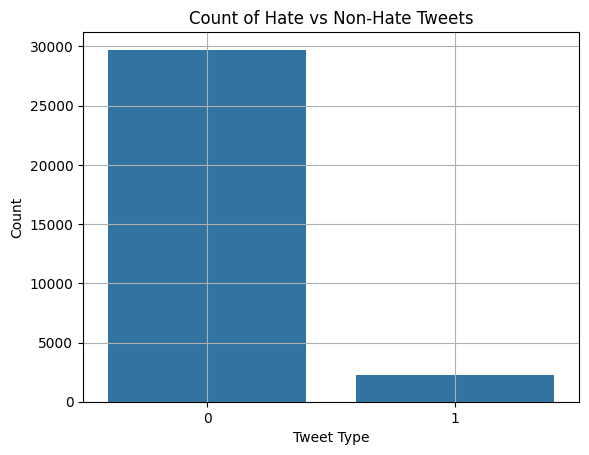

In [197]:
# Check if the 'label' column exists in the dataset
if 'label' in dataset.columns:
    sns.countplot(x=dataset['label'])
    plt.title('Count of Hate vs Non-Hate Tweets')
    plt.xlabel('Tweet Type')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()
else:
    print("The 'label' column is not present in the dataset.")

[('love', 2750), ('day', 2303), ('happy', 1674), ('dd', 1347), ('like', 1160), ('time', 1130), ('life', 1123), ('today', 1012), ('new', 994), ('thankful', 946)]


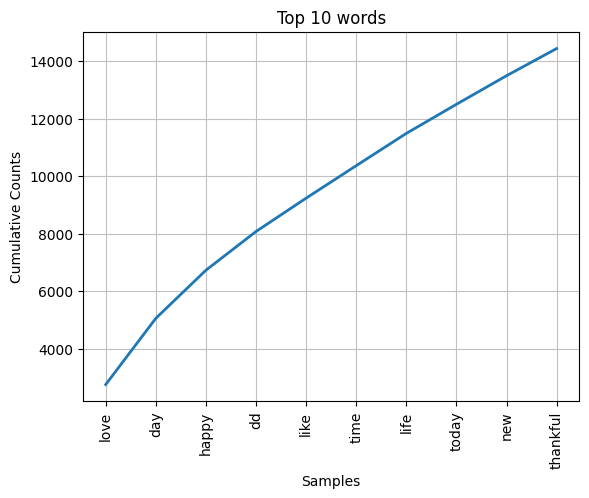

In [198]:
from collections import Counter
count = Counter()
dataset['tweet'].apply(count.update)
#print the top 10 most common terms in the tweet 
print(count.most_common(10))

frequency = nltk.FreqDist(count)
plt.title('Top 10 words')
frequency.plot(10,cumulative=True)
plt.show()

In [199]:
dataset.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, urd, ddddd]"
4,0,"[factsguide, society, motivation]"


In [200]:
dataset.isnull().sum()

label    0
tweet    0
dtype: int64

In [201]:
dataset['tweet'] = dataset['tweet'].apply(lambda x: ' '.join(x))

In [202]:
dataset.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time urd ddddd
4,0,factsguide society motivation


In [203]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Assuming the text data is stored in 'dataset['tweet']'
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(dataset['tweet'])

# Save the vectorizer
vectorizer_filename = 'vectorizer.pkl'
with open(vectorizer_filename, 'wb') as file:
    pickle.dump(vectorizer, file)


In [204]:
# Assigning variable:  X and y
X = dataset['tweet']
y = dataset['label']

#splitting the data into training and testing sets

from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.2  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


In [205]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer # type: ignore
from sklearn.feature_extraction.text import TfidfTransformer # type: ignore
vectorizer = TfidfVectorizer(max_features = 5000)

#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [206]:
#import the models
from sklearn.linear_model import LogisticRegression # type: ignore
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [207]:
#import the metrics
from sklearn.metrics import accuracy_score # type: ignore
from sklearn.metrics import f1_score # type: ignore
from sklearn.metrics import classification_report # type: ignore
from sklearn.metrics import confusion_matrix # type: ignore

#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.95518
Accuracy Score on test set 0.95104


In [208]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.94      0.38      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.95      0.96      0.95     25569



In [209]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.91      0.33      0.49       448

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393



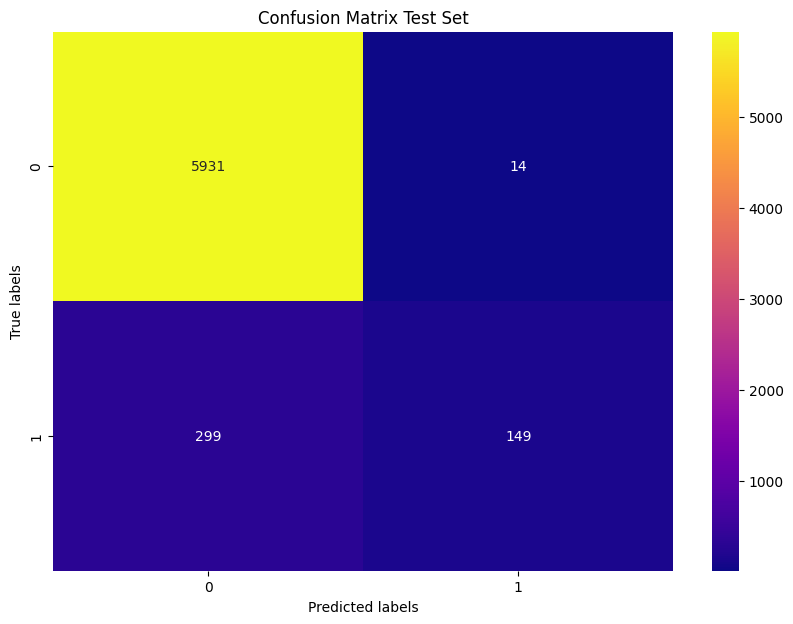

In [210]:

from sklearn.metrics import confusion_matrix

# Predicting the test set results
y_pred = clf.predict(X_test)

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))  # Optional: Adjusts the size of the plot
sns.heatmap(cm, annot=True, fmt='g', cmap='plasma')  # 'g' formatter prevents scientific notation
plt.title('Confusion Matrix Test Set')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()




In [245]:
import pickle
import re
from unidecode import unidecode
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your trained model is stored in a variable named 'trained_model'
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(clf, file)


# Define preprocessing functions
def remove_diacritics(text):
    return unidecode(text)

def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

def remove_urls(text):
    url_pattern = r'https?://\S+|www\.\S+'
    return re.sub(url_pattern, '', text)

def remove_stopwords(tokens, stop_words):
    return [word for word in tokens if word not in stop_words]

def remove_hashsymbols(text):
    return re.sub(r'#', '', text)

def remove_shortwords(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

def remove_digits(text):
    return re.sub(r'\d', '', text)

def rem_nonalpha(tokens):
    return [word for word in tokens if word.isalpha()]

# Load the trained model
with open('lr_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Load the vectorizer
with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Preprocess new data for inferencing
new_data = "yoy are a bastard"
new_data = remove_diacritics(new_data)
new_data = remove_usernames(new_data)
new_data = remove_urls(new_data)

# Tokenization - Example using a simple split; replace with actual tokenizer used during model training
tokens = new_data.split()
tokens = remove_stopwords(tokens, stop_words)  # Define `stop_words` list based on your setup
tokens = rem_nonalpha(tokens)
new_data = remove_hashsymbols(' '.join(tokens))
new_data = remove_shortwords(new_data)
new_data = remove_digits(new_data)

print("Processed new data:", new_data)

# Transform the processed new data for prediction
transformed_data = vectorizer.transform([new_data])
print("Transformed data:", transformed_data)
predictions = loaded_model.predict(transformed_data)
print("Predictions:", predictions)


Processed new data: yoy bastard
Transformed data:   (0, 4983)	0.6936187908213408
  (0, 360)	0.7203422610256467
Predictions: [0]
